TESTE:
# Título Grande
## Subtítulo
**Negrito** e *itálico*  
- Lista de itens
- Outro item
1. Lista numerada
2. Segundo item
[Link para o Google](https://www.google.com)

# Análise Exploratória dos Dados (EDA)

Inicialmente, foi realizada a leitura do dataset para iniciar a análise dos dados e examinar o conjunto de variáveis disponíveis.

O dataset contém diversas informações relevantes, como o preço por noite do aluguel, o tipo de espaço, a localização, a disponibilidade anual do quarto, o número mínimo de noites para reserva e a quantidade de avaliações. Esses dados são fundamentais para auxiliar o cliente na escolha do local ideal.

Além disso, o dataset também inclui informações relacionadas à identificação do anúncio na plataforma e sobre o Host, como os IDs, o nome do Host e o título do anúncio. Esses detalhes podem ser úteis para entender melhor a origem dos dados e a relação entre os anúncios e seus respectivos hosts.

### Leitura dos dados & Visualização

In [3]:
# Bibliotecas
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import geodatasets as gds
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Leitura do DataSet & Dicionario de informações
help = {'id': 'Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo',
        'nome': 'Representa o nome do anúncio',
        'host_id': 'Representa o id do usuário que hospedou o anúncio',
        'host_name': 'Contém o nome do usuário que hospedou o anúncio',
        'bairro_group': 'Contém o nome do bairro onde o anúncio está localizado',
        'bairro': 'Contém o nome da área onde o anúncio está localizado',
        'latitude': 'Contém a latitude do local',
        'longitude': 'Contém a longitude do local',
        'room_type': 'Contém o tipo de espaço de cada anúncio',
        'price': 'Contém o preço por noite em dólares listado pelo anfitrião',
        'minimo_noites':'Contém o número mínimo de noites que o usuário deve reservar',
        'numero_de_reviews': 'Contém o número de comentários dados a cada listagem',
        'ultima_review': 'Contém a data da última revisão dada à listagem',
        'reviews_por_mes': 'Contém o número de avaliações fornecidas por mês',
        'calculado_host_listings_count': 'Contém a quantidade de listagem por host',
        'disponibilidade_365': 'Contém o número de dias em que o anúncio está disponível para reserva'}

df = pd.read_csv('teste_indicium_precificacao.csv')
df.head(20)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


---
A análise do resumo estatístico obtido via describe() revela a presença de aluguéis com preço igual a 0, bem como outliers com valores superiores a 10.000 dólares por noite.

Além disso, algumas acomodações exigem um número mínimo de noites muito superior ao percentil de 75% (5 noites), chegando a 1.250 noites no máximo.

O primeiro caso pode estar associado a acomodações altamente luxuosas, enquanto o segundo pode indicar que o anfitrião busca minimizar a rotatividade de hóspedes.

Esses outliers podem distorcer as análises e comprometer o desempenho do modelo, tornando sua remoção uma possível etapa importante no pré-processamento dos dados.

In [15]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.090928,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.597294,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


---
Algumas colunas possuem valores faltantes, como as colunas "ultima review" e "reviews_por_mes", que de acordo com df.head() e o df.info(), estão preenchidos com dados NaN.

Para esses valores ausentes, com a intenção de impedir possiveis erros de código durante a análise, foi definido a seguinte estrutura de substituição:


Nas colunas...
- "nome": NaN será substituido pela a palavra "For rent"
- "host_name": NaN será preenchido por "Unknown"
- "ultima_review": NaN por 0 
- "reviews_por_mes": NaN por 0 --> Estamos assumindo que o espaço nunca recebeu reviews

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [11]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [100]:
df['nome'] = df['nome'].fillna("For rent")
df['host_name'] = df['host_name'].fillna("Unknown")
df['ultima_review'] = df['ultima_review'].fillna(0)
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)

In [60]:
df.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [10]:
print('N° de Bairros:', len(df.bairro_group.unique()), 
    '\nN° de lugares:', len(df.bairro.unique()),
    '\nN° de host:', len(df.host_name.unique()))

N° de Bairros: 5 
N° de lugares: 221 
N° de host: 11453


## Hipóteses de négocio
***

A partir das informações fornecidas pelo dataset, com o objetivo de desenvolver um modelo para predição do preço de um aluguel, buscamos relacionar as variaveis que melhor impactam o valor de um aluguel. 

Portanto, é esperado que algumas hipóteses sejam formuladas, tais como:

1. O tipo do espaço deve impactar fortemente o preço: 
- É esperado que os "Entire home/apt" (Apartamentos/casas inteiro) stenham preços mais altos do que os demais
- Private room ("Quartos privados") tenham preços intermediários
- Shared room ("Quartos compartilhados") sejam os mais baratos

2. A localização (Bairros) também deve influenciar os preços (Lógica da oferta e demanda):
- Regiões centrais ou turísticas devem ter preços, em média, mais elevados
- Regiões mais afastadas dos centros devem ter preços mais baixos

3. A avaliação do espaço pode indicar maiores demandas (Lógica da oferta e demanda):
- Anuncios com muitos reviews pode significar alta procura e consequentemente ter preços competitivos
- Anuncios com poucas avaliações pode indicar espaços novos ou poucos atrativos
- A frequência de reviews por mês pode representar uma distribuição desigual:  algumas regiões podem ter alta procura e preços altos, enquanto outras têm alta demanda por serem baratas.

4. Alta disponibilidade anual pode diminuir os valores dos preços (Lógica da oferta e demanda)
- Espaços muito disponíveis tendem a ter preços mais baixos devido à necessidade de manter a ocupação alta.
- Espaços pouco disponiveis podem ter preços mais elevados, uma vez que são mais raros a disponibilidade.

5. Mínimo de noites mais baixos (como minimo_noites = 1) podem ter preços mais baixos, pois podem ser locais com foco em atender turistas de curta duração. Em contrapartida, mínimo de noites mais altos pode indicar preços mais altos pois o host busca estadias mais longas e menos trocas de hóspedes

6. Algumas palavras no nome do anuncio pode sinalizar imóveis caros, como Luxury, nome de um bairro de alto padrão (ex. Manhathan), apartamentos modernos (loft) entre outros.

---
### Hipótese 1: O tipo do espaço deve impactar fortemente o preço: 

É esperado que o preço médio por noite siga a ordem:


-Entire home/apt > Private room > Shared room


Para avaliar essa hipótese, foi elaborado um boxplot do preço por tipo de espaço (Figura 1). Como esperado, a análise visual do gráfico à direita confirma essa hierarquia, uma vez que a mediana, o terceiro quartil e o limite superior são maiores para "Entire home/apt", seguidos por "Private room" e, por último, "Shared room".


No gráfico à esquerda, observa-se que os outliers seguem esse mesmo padrão, com valores significativamente mais altos para "Entire home/apt". No entanto, como esses valores extremos representam, em geral, menos de 5% dos dados, seu impacto pode ser desconsiderado na análise principal.

Text(0.5, 0.98, 'Figura 1: Preço por noite em função do tipo de espaço')

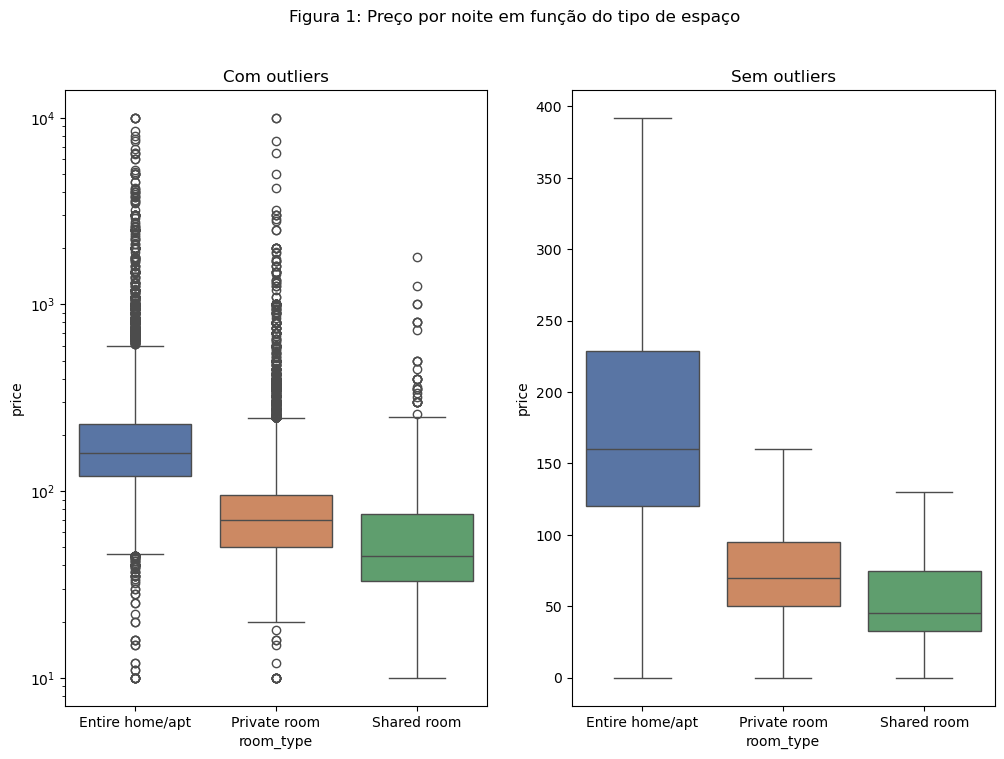

In [104]:
# Boxplot Preço x Tipo de espaço
fig, ax = plt.subplots(ncols=2, figsize=(12,8))
ax[0].set_title('Com outliers')
ax[0].set_yscale('log')
ax[1].set_title('Sem outliers')
sn.boxplot(data=df, x='room_type', y='price', ax=ax[0], palette='deep')
sn.boxplot(data=df, x='room_type', y='price', ax=ax[1], showfliers=False, palette='deep')
fig.suptitle('Figura 1: Preço por noite em função do tipo de espaço')


---
### Hipótese 2: A localização (Bairros) deve influenciar os preços (Lógica da oferta e demanda)

É esperado que:

- Regiões centrais ou turísticas (como Manhattan) tenham preços, em média, mais elevados
- Regiões mais afastadas dos centros (como Bronx e Staten Island) tenham preços mais baixos

Para avaliar essa hipótese, foi realizado o plot de um Heatmap de localização dos imóveis no estado de Nova Iorque pelo preço (Figura 2) e a distribuição de preços por bairro por meio de boxplots (Figura 3).

In [11]:
# Descartando os outliers
df_ = df[df['price'] < df['price'].quantile(0.95)]

# Centroids de cada bairro para adicionar o nome dos bairros no mapa
bairro_ny = pd.DataFrame({
    'latitude': [40.776, 40.650, 40.742, 40.579, 40.837], 
    'longitude': [-73.971, -73.949, -73.769, -74.152, -73.865],
    'city': ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']
})

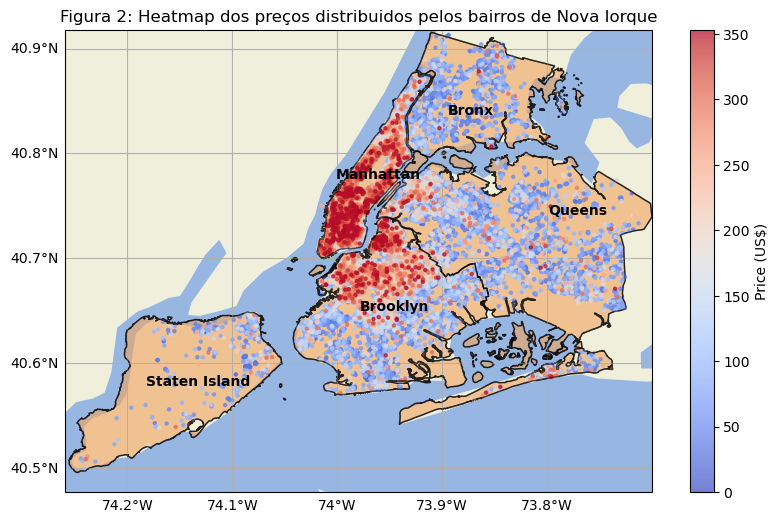

In [164]:
# Obtendo o shapefile do Estado de Nova Iorque usando Geopandas e o Geodatasets
gny = gpd.read_file(gds.get_path("nybb"))

# Iniciando a figura com projeção do Cartopy
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Definindo limites da área de Nova York
ax.set_extent([-74.2591, -73.7004, 40.4774, 40.9176], crs=ccrs.PlateCarree())
ax.set_title('Figura 2: Heatmap dos preços distribuidos pelos bairros de Nova Iorque')

# Ordenando o dataframe pela coluna de preços para evidenciar melhor as regiões de altos preços no Heatmap 
df_ = df_.sort_values(by='price')

# Heatmap
sc = ax.scatter(df_['longitude'], df_['latitude'], c=df_['price'], cmap='coolwarm', alpha=0.7, s=5,zorder=10, transform=ccrs.PlateCarree())

# Adicionando o nome dos bairros
for i in range(len(bairro_ny)):
    ax.text(bairro_ny['longitude'][i]-0.03,
            bairro_ny['latitude'][i],
            bairro_ny['city'][i], 
            fontsize=10, fontweight='bold',
            ha='left',
            transform=ccrs.PlateCarree(), zorder=30)

gny.to_crs(ccrs.PlateCarree()).plot(alpha=0.6, edgecolor="k", ax=ax, facecolor='sandybrown', zorder=1, lw=1)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
gny.to_crs(ccrs.PlateCarree()).plot(alpha=0.6, edgecolor="k", ax=ax, facecolor='None', zorder=20) # Coloquei novamente para reforçar as linhas divisórias do mapa

plt.colorbar(sc, ax=ax, label="Price (US$)")
ax.gridlines(draw_labels={"bottom": "x", "left": "y"})


---
A análise da Figura 2 confirma a expectativa de que os aluguéis mais caros estão concentrados em Manhattan e no norte do Brooklyn, especialmente nas áreas próximas à divisa com Manhattan. Por outro lado, regiões mais afastadas, como Staten Island, Bronx, Queens e o sul do Brooklyn, apresentam os preços mais baixos.

Além disso, o gráfico da Figura 3 evidencia a hierarquia dos bairros mais caros, com Manhattan liderando, seguido por Brooklyn, Queens, Staten Island e, por último, o Bronx. Essa classificação é baseada na assimetria da distribuição dos preços em relação à mediana e no comprimento das caixas do boxplot. Ou seja, quanto maior a assimetria para cima da mediana, mais concentrados estão os altos valores dos preços. Além disso, caixas mais longas indicam uma maior variabilidade dos preços dentro do intervalo interquartil, sugerindo uma distribuição mais ampla de valores elevados.

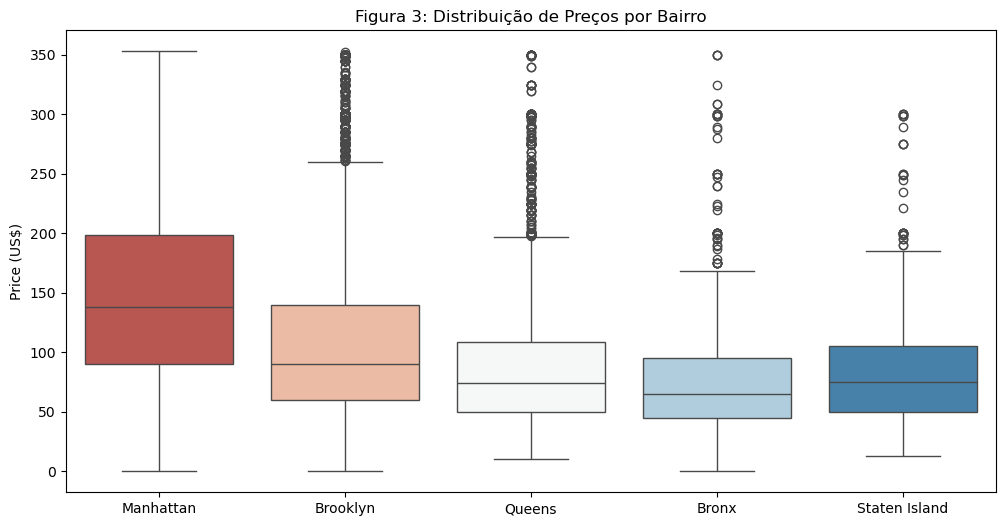

In [142]:
plt.figure(figsize=(12, 6))
sn.boxplot(data=df_.sort_values(by='price', ascending=False), x='bairro_group', y='price', palette='RdBu')
plt.title("Figura 3: Distribuição de Preços por Bairro")
plt.xlabel("")
plt.ylabel("Price (US$)")
plt.show()


---
### Hipótese 3: A avaliação do Imóvel pode indicar maiores demandas (Lógica da oferta e demanda)

É esperado que:

- Anúncios com muitos reviews sejam indicativos de alta procura, o que pode resultar em preços mais competitivos.
- Anúncios com poucas avaliações representem acomodações novas ou pouco atrativas.
- A frequência de avaliações mensais pode refletir duas dinâmicas distintas:
    1. Alta demanda e preços elevados: Se um imóvel recebe muitas avaliações por mês, é provável que seja bem localizado e tenha um bom custo-benefício, justificando preços mais altos.
    2. Alta demanda devido a preços baixos: Caso o preço seja muito competitivo, ele pode atrair mais hóspedes, aumentando a quantidade de reviews mensais.
 

Para testar essas hipóteses, analisou-se a relação entre o número total de avaliações (reviews) e a frequência de avaliações por mês com o preço do espaço (Figuras 4 e 5).
Os resultados da Figura 4 mostram que imóveis com poucas avaliações apresentam grande variabilidade nos preços. No entanto, à medida que o número de avaliações aumenta, a amplitude da variabilidade dos preços tendem a diminuir, sugerindo um comportamento competitivo no mercado, onde os hosts ajustam os valores para atrair mais clientes.
Esse mesmo padrão é observado na Figura 5, onde a variabilidade dos preços diminui conforme cresce a frequência de avaliações mensais. Essa tendência indica que acomodações com um maior histórico de avaliações podem estar mais alinhadas às expectativas de preço dos consumidores.

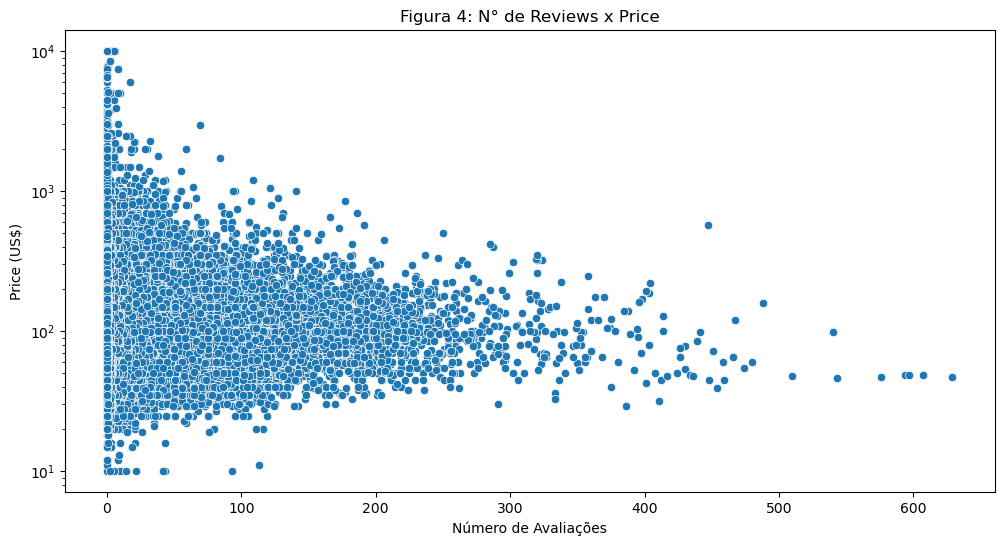

In [34]:
plt.figure(figsize=((12,6)))
sn.scatterplot(data=df, x='numero_de_reviews', y='price', alpha=1)
plt.title("Figura 4: N° de Reviews x Price")
plt.xlabel("Número de Avaliações")
plt.ylabel("Price (US$)")
plt.yscale("log")


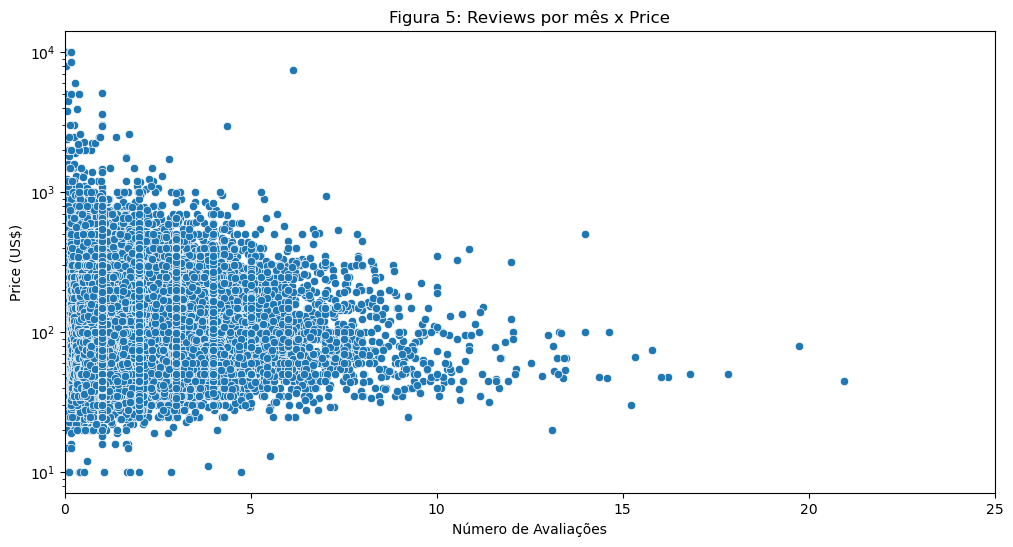

In [38]:
plt.figure(figsize=((12,6)))
sn.scatterplot(data=df, x='reviews_por_mes', y='price', alpha=1)
plt.title("Figura 5: Reviews por mês x Price")
plt.xlabel("Número de Avaliações")
plt.ylabel("Price (US$)")
plt.yscale("log")
plt.xlim([0, 25])

---
### Hipótese 4: Alta disponibilidade anual pode diminuir os valores dos preços (Lógica da oferta e demanda)

É esperado que:
- Espaços com alta disponibilidade ao longo do ano tendam a ter preços mais baixos, pois os hosts buscam manter uma alta taxa de ocupação, muitas vezes reduzindo os valores para atrair mais reservas.
  
- Espaços com pouca disponibilidade podem apresentar preços mais elevados, uma vez que são mais exclusivos, e consequentemente mais valorizados no mercado.

Essa dinâmica reflete a relação entre oferta e demanda, onde a escassez de disponibilidade pode justificar preços mais altos.

Para avaliar essa hipótese, foi analisada a dispersão entre a variável disponibilidade_365 e o preço (price), com o objetivo de observar a relação entre ambas (Figura 6). A análise do gráfico de dispersão permite verificar se há uma tendência de redução nos preços à medida que a disponibilidade anual aumenta, corroborando a hipótese de que hosts ajustam os valores para maximizar a ocupação de seus imóveis. Por outro lado, a Figura 6 apresenta uma grande variabilidade em toda a escala de disponibilidade anual, indicando que deve haver alguns hosts que mesmo com alta disponibilidade, mantêm preços mais altos devido a fatores como localização privilegiada, comodidades exclusivas ou reputação do anúncio.

Com isso em mente, a análise foi segmentada por tipo de imóvel e por localização (Figuras 7 e 8, respectivamente). No entanto, mesmo com essa segmentação, não foi observada uma relação clara entre a disponibilidade e o preço. Em todos os casos, os preços apresentam uma grande variabilidade em toda a escala da variável disponibilidade_365, independentemente do tipo de imóvel ou da localização. Isso indica que a disponibilidade anual, por si só, não é um fator determinante para a precificação.

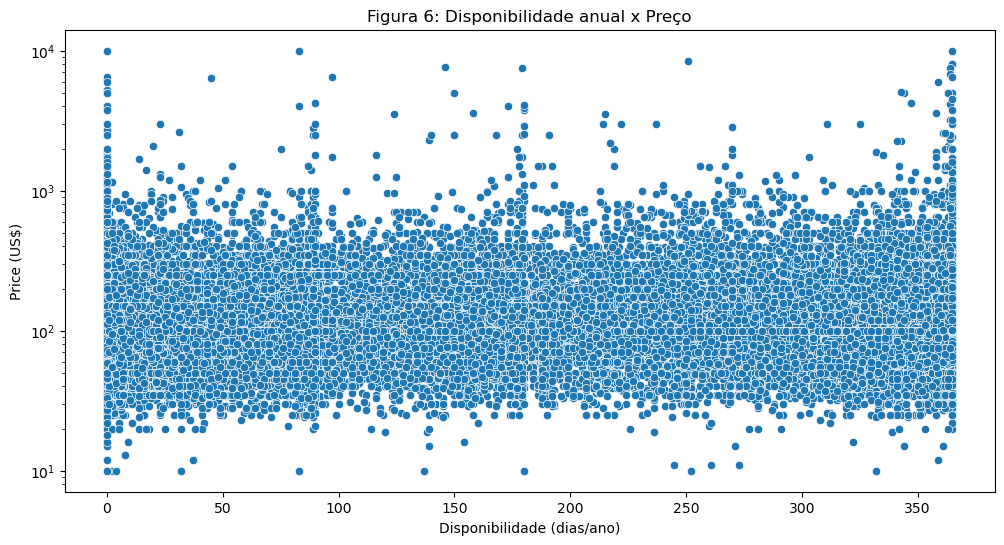

In [54]:
plt.figure(figsize=((12,6)))
sn.scatterplot(data=df, x='disponibilidade_365', y='price', alpha=1)
plt.title("Figura 6: Disponibilidade anual x Preço")
plt.xlabel("Disponibilidade (dias/ano)")
plt.ylabel("Price (US$)")
plt.yscale("log")

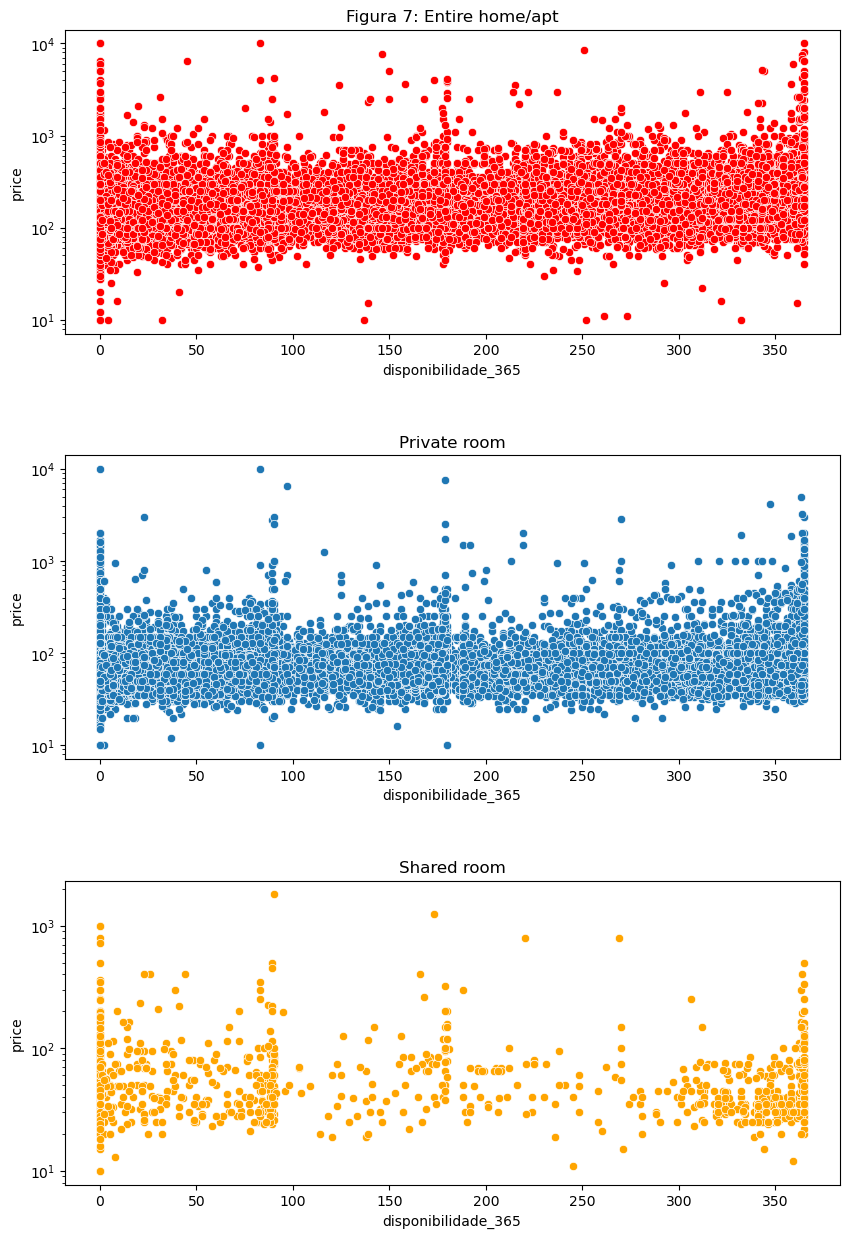

In [56]:
fig, ax = plt.subplots(nrows=3, figsize = (10,15))

sn.scatterplot(ax=ax[0], color='red',
               data=df[df['room_type']=='Entire home/apt'],
               x='disponibilidade_365', y='price', alpha=1)
ax[0].set_title('Figura 7: Entire home/apt')
ax[0].set_yscale('log')

sn.scatterplot(ax=ax[1],
               data=df[df['room_type']=='Private room'],
               x='disponibilidade_365', y='price', alpha=1)
ax[1].set_title('Private room')
ax[1].set_yscale('log')

sn.scatterplot(ax=ax[2], color='orange',
               data=df[df['room_type']=='Shared room'],
               x='disponibilidade_365', y='price', alpha=1)
ax[2].set_title('Shared room')
ax[2].set_yscale('log')
plt.subplots_adjust(hspace=0.4)

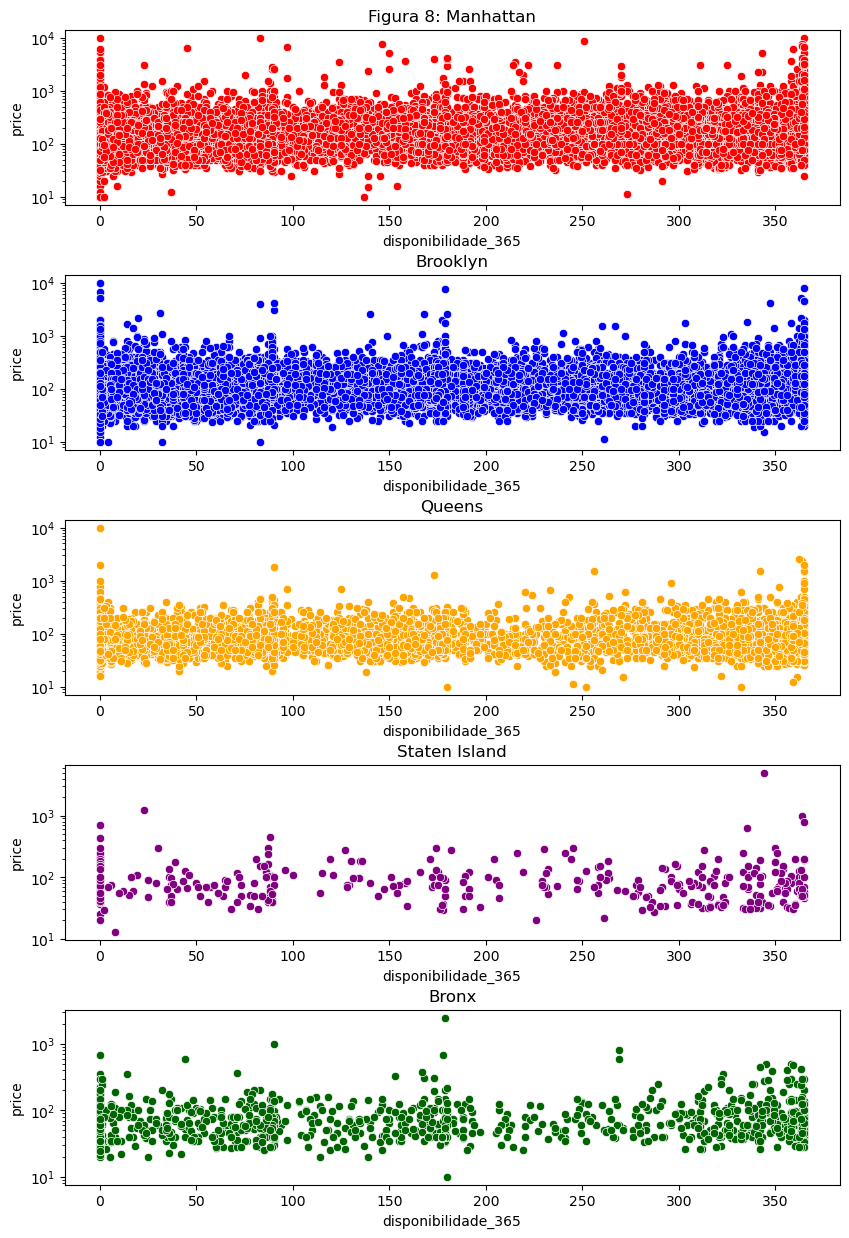

In [58]:
fig, ax = plt.subplots(nrows=5, figsize = (10,15))

cities = list(bairro_ny.city)
color = ['red', 'blue', 'orange', 'purple', 'darkgreen']

for i in range(len(cities)):
    sn.scatterplot(ax=ax[i], color=color[i],
               data=df[df['bairro_group']==cities[i]],
               x='disponibilidade_365', y='price', alpha=1)
    if i ==0:
        ax[i].set_title('Figura 8: Manhattan')
    else:
        ax[i].set_title(f'{cities[i]}')
    ax[i].set_yscale('log')

plt.subplots_adjust(hspace=0.4)

---
### Hipótese 5: Mínimo de noites x Preço

É esperado que:

- Mínimos de noites mais baixos (como minimo_noites = 1) que deveriam estar associados a preços mais baixos, pois esses imóveis tendem a atender turistas em estadias curtas, com foco em maior rotatividade e ocupação, podem ter uma alta amplitude de variação de preços devido a diversidade de tipos de imóveis.

-A amplitude da distribuição dos preços diminuem conforme o número mínimo de noites exigido cresce, com uma possível estabilização para estadias muito longas.

Para avaliar essa hipótese, foi analisada a relação entre o número mínimo de noites e o preço ofertado (Figura 9). Os resultados confirmam razoavelmente as expectativas levantadas, evidenciando uma leve redução na amplitude da distribuição dos preços conforme aumenta o requisito de estadia mínima, especialmente em regiões mais afastadas do centro de Nova Iorque.

Além disso, a Figura 10 reforça a hipótese de que imóveis com menor exigência de noites mínimas tendem a ter preços mais baixos.

(0.0, 600.0)

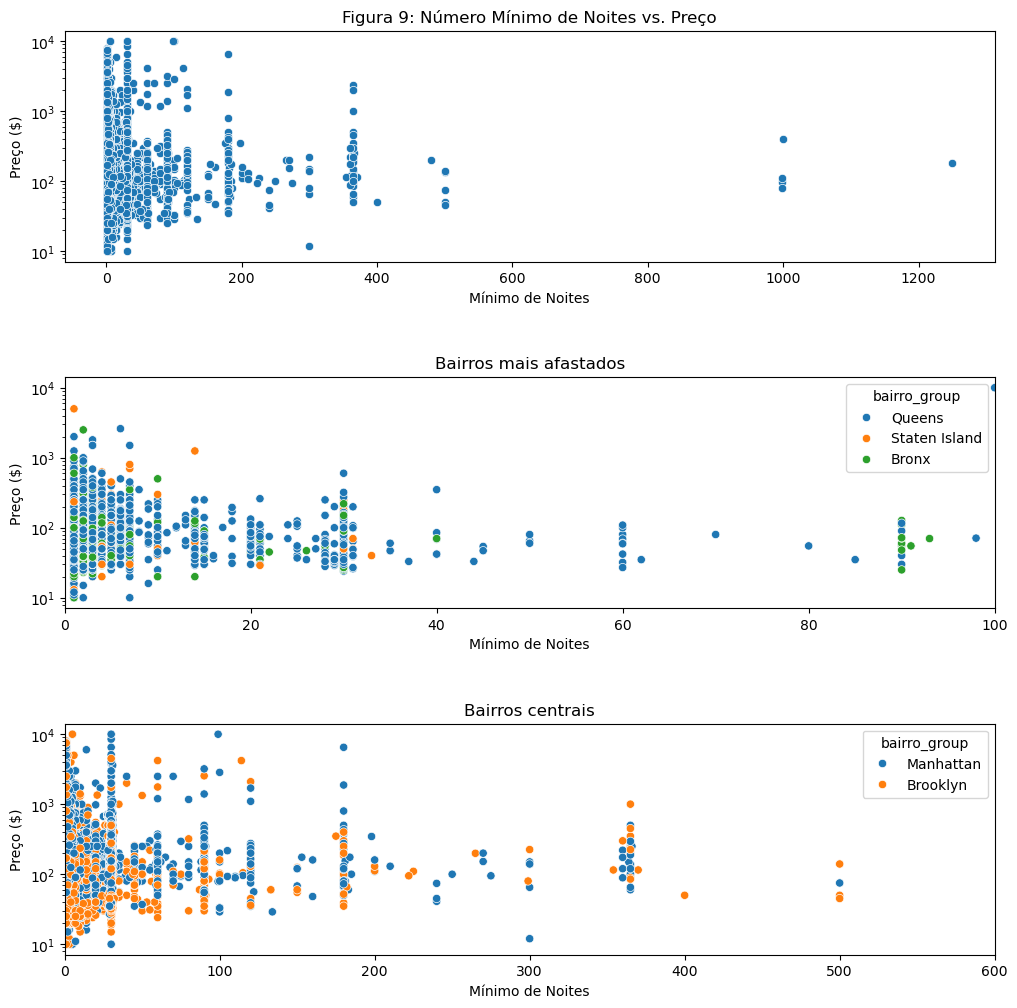

In [149]:
fig, ax = plt.subplots(nrows=3, figsize=(12,12))
fig.subplots_adjust(hspace=0.5)

sn.scatterplot(ax=ax[0], data=df, x='minimo_noites', y='price', alpha=1)
ax[0].set_title("Figura 9: Número Mínimo de Noites vs. Preço")
ax[0].set_xlabel("Mínimo de Noites")
ax[0].set_ylabel("Preço ($)")
ax[0].set_yscale("log")

sn.scatterplot(ax=ax[1], 
               data=df[(df.bairro_group == 'Queens') | 
                        (df.bairro_group == 'Bronx') | 
                        (df.bairro_group == 'Staten Island')],
               x='minimo_noites', y='price', hue='bairro_group', alpha=1)

ax[1].set_title("Bairros mais afastados")
ax[1].set_xlabel("Mínimo de Noites")
ax[1].set_ylabel("Preço ($)")
ax[1].set_yscale("log")
ax[1].set_xlim(0, 100)  

sn.scatterplot(ax=ax[2], 
               data=df[(df.bairro_group != 'Queens') & 
                        (df.bairro_group != 'Bronx') & 
                        (df.bairro_group != 'Staten Island')],
               x='minimo_noites', y='price', hue='bairro_group', alpha=1)

ax[2].set_title("Bairros centrais")
ax[2].set_xlabel("Mínimo de Noites")
ax[2].set_ylabel("Preço ($)")
ax[2].set_yscale("log")
ax[2].set_xlim(0, 600)  


Text(0.5, 0, 'Mínimo de Noites')

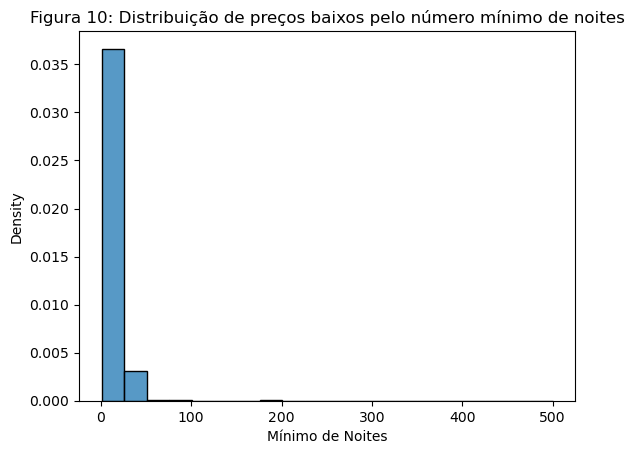

In [180]:
df1 = df[df['price'] < df['price'].quantile(0.99)]
fig, ax = plt.subplots(nrows=1)
fig.subplots_adjust(hspace=0.5)

price_low = df.price.quantile(0.3)

sn.histplot(ax=ax, data=df[df.price <= price_low], x='minimo_noites', stat='density', bins=20)
ax.set_title("Figura 10: Distribuição de preços baixos pelo número mínimo de noites")
ax.set_xlabel("Mínimo de Noites")


---
### Hipótese 6: Padrão de palavras para imóveis de alto valor no titulo do anuncio

É esperado que alguns conjuntos de palavras especiais indicam imoveis de alto ou baixo valor, tais como:

- Palavras que indicam luxo ou exclusividade, como: "Luxury", "Exclusive", "Modern" e etc

- Presença de Nomes de bairros ou pontos turísticos prestigiados, como: "Times Square", "Central Park"

- Nome de imoveis, como: "Entire Apartment", "Loft", "Studio", "Villa"


Para avaliar essa hipótese, foram realizadas duas abordagens de visualização. Na primeira, utilizando a biblioteca WordCloud, foi gerada uma nuvem de palavras para o quartil 0.99, que representa os imóveis de maior valor, com o objetivo de identificar se as palavras associadas a luxo, exclusividade ou localização privilegiada aparecem com destaque (Figura 11).

Na segunda abordagem (Figura 12), os gráficos listam (em percentual) as palavras mais frequentes nos anúncios, comparando tanto os imóveis mais caros quanto os mais baratos. Além disso, o terceiro gráfico dessa figura destaca as palavras que são exclusivas aos anúncios de imóveis de alto valor, ajudando a identificar termos que podem estar associados a preços mais elevados.

A Figura 11 mostra que palavras como Loft, Luxury, Bedroom, Townhouse, Manhattan, Private, Duplex, Brooklyn, Room, entre outras, são as mais frequentes nos anúncios de imóveis de alto padrão. No entanto, algumas dessas palavras, como Bedroom, Private e Room, são genéricas e também aparecem com frequência em anúncios de imóveis de baixo valor, conforme evidenciado na Figura 12.

O terceiro g da Figura 12ráfico, que contém apenas as palavras exclusivas aos anúncios de alto valor, confirma o padrão de termos como Luxury, Loft, Village, Central, Midtown, West, East, Duplex, New, Townhouse e Suite como os mais frequentes. Essas palavras estão claramente associadas a imóveis de alto padrão, reforçando a hipótese de que a escolha de termos específicos nos títulos dos anúncios pode influenciar a percepção de valor pelos consumidnclusão:
A análise confirma que certas palavras estão fortemente associadas a imóveis de alto valor, como termos que indicam luxo, localizações privilegiadas ou tipos específicos de imóveis. Enquanto palavras genéricas aparecem em ambos os grupos (alto e baixo valor), as exclusivas aos anúncios de alto padrão destacam-se como indicadores claros de imóveis mais caros. Isso sugere que a linguagem utilizada nos títulos dos anúncios pode ser um fator relevante na definição do valor percebido pelos consumidores.res.

(-0.5, 799.5, 399.5, -0.5)

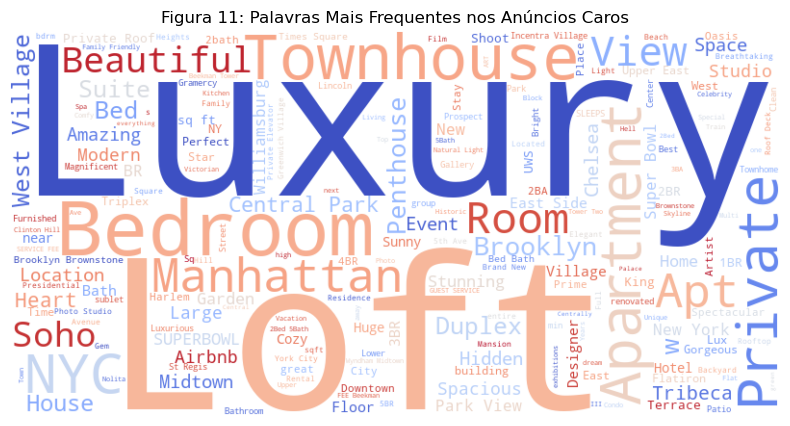

In [107]:
from wordcloud import WordCloud

high_price = df[df['price'] > df['price'].quantile(0.99)]
text = " ".join(high_price['nome'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Figura 11: Palavras Mais Frequentes nos Anúncios Caros")
plt.axis("off")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DaniloDC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


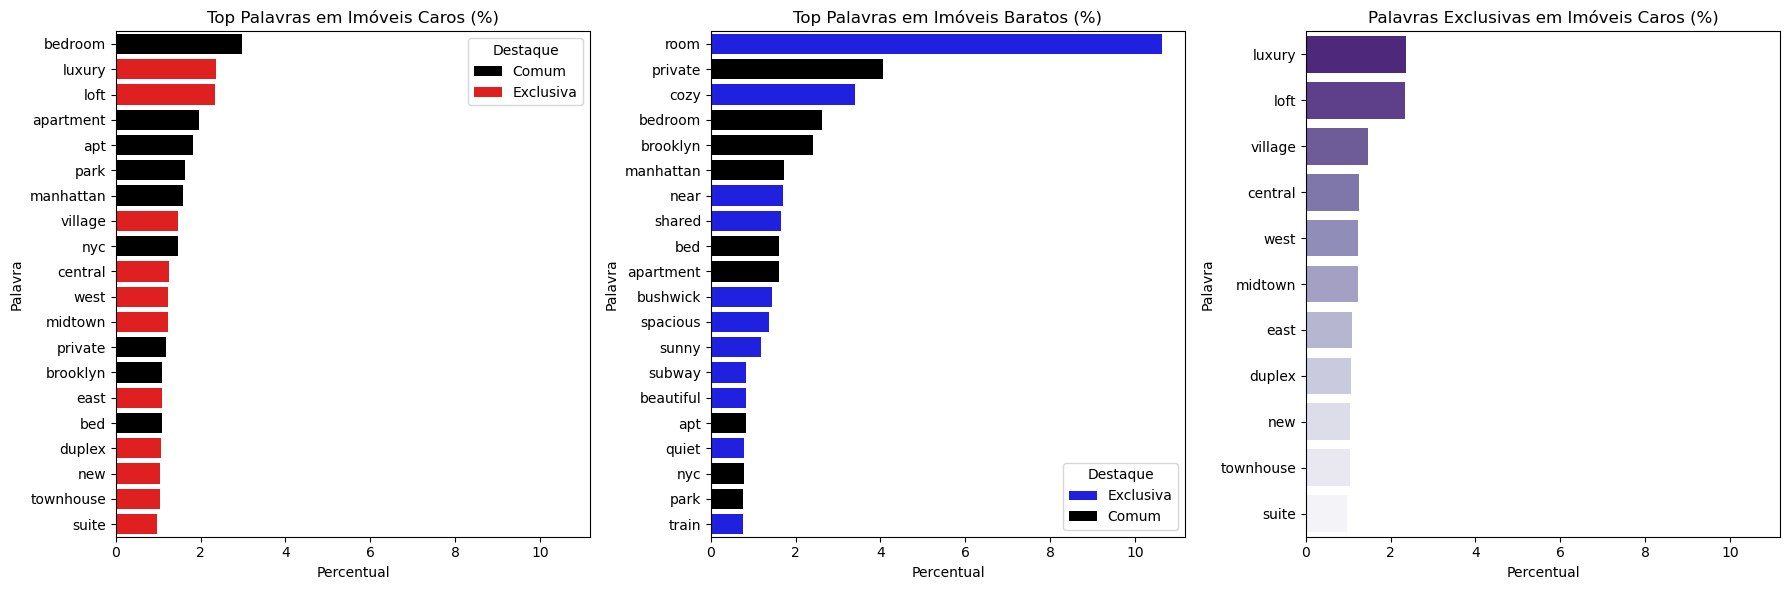

In [109]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from nltk.corpus import stopwords
from collections import Counter
import nltk

# Baixar stopwords do NLTK (caso necessário)
nltk.download('stopwords')

# Criar lista de stopwords
stop_words = set(stopwords.words('english'))  

# Função para contar palavras e calcular percentual
def get_top_words_filtered(df, column, stopwords, n=20):
    text = " ".join(df[column].dropna()).lower()  # Concatenar os nomes
    words = re.findall(r'\b[a-zA-Z]{3,}\b', text)  # Manter apenas palavras com 3+ letras
    filtered_words = [word for word in words if word not in stopwords]  # Remover stopwords
    counter = Counter(filtered_words)  # Contar frequência
    total_words = sum(counter.values())  # Total de palavras analisadas
    return pd.DataFrame([(word, count, round(count / total_words * 100, 2)) for word, count in counter.most_common(n)], 
                        columns=['Palavra', 'Frequência', 'Percentual'])

# Separar imóveis caros e baratos (top 5% e bottom 5%)
high_price = df[df['price'] > df['price'].quantile(0.95)]
low_price = df[df['price'] < df['price'].quantile(0.05)]

df_high = get_top_words_filtered(high_price, 'nome', stop_words)
df_low = get_top_words_filtered(low_price, 'nome', stop_words)

# Criar conjunto de palavras para comparação
high_words = set(df_high['Palavra'])
low_words = set(df_low['Palavra'])

# Palavras em comum
common_words = high_words & low_words  # Interseção entre os dois conjuntos

# Adicionar uma coluna para identificar palavras comuns
df_high['Destaque'] = df_high['Palavra'].apply(lambda x: 'Comum' if x in common_words else 'Exclusiva')
df_low['Destaque'] = df_low['Palavra'].apply(lambda x: 'Comum' if x in common_words else 'Exclusiva')

# Palavras exclusivas dos caros
exclusive_high_words = df_high[df_high['Palavra'].isin(high_words - low_words)]

# Criando a visualização com 3 gráficos
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Imóveis caros (com destaque)
sn.barplot(data=df_high, y='Palavra', x='Percentual', hue='Destaque', palette={'Comum': 'black', 'Exclusiva': 'red'}, ax=ax[0])
ax[0].set_title("Top Palavras em Imóveis Caros (%)")

# Imóveis baratos (com destaque)
sn.barplot(data=df_low, y='Palavra', x='Percentual', hue='Destaque', palette={'Comum': 'black', 'Exclusiva': 'blue'}, ax=ax[1])
ax[1].set_title("Top Palavras em Imóveis Baratos (%)")

# Palavras exclusivas dos caros
sn.barplot(data=exclusive_high_words, y='Palavra', x='Percentual', palette='Purples_r', ax=ax[2])
ax[2].set_title("Palavras Exclusivas em Imóveis Caros (%)")

plt.tight_layout()
plt.show()


In [58]:
import pandas as pd

# Listas de palavras-chave
tipos_acomodacao = ["Entire Apartment", "Loft", "Studio", "Villa", "House", "Bungalow", "Penthouse"]
caracteristicas_valor = ["Sea View", "Rooftop", "Pool", "Jacuzzi", "Balcony", "Garden", "Fireplace"]
pontos_turisticos = ["Times Square", "Central Park", "Downtown", "Broadway", "Empire State", "Brooklyn Bridge"]
keywords_anteriores = ["Luxury", "Spacious", "Cozy", "Modern", "Charming", "Elegant", "Historic", "Exclusive", "5 Stars", "VIP", "Modern"]

# Criar um dicionário para armazenar os percentuais
percentuais = {}

# Função para calcular percentual de ocorrência
def calcular_percentual(lista_termos, coluna):
    total_anuncios = len(coluna)
    return {termo: round(coluna.str.contains(termo, case=False, na=False).sum() / total_anuncios * 100, 2) for termo in lista_termos}

# Calcular percentuais para cada categoria
percentuais["Tipos de Acomodação"] = calcular_percentual(tipos_acomodacao, high_price["nome"])
percentuais["Características de Valor"] = calcular_percentual(caracteristicas_valor, high_price["nome"])
percentuais["Pontos Turísticos"] = calcular_percentual(pontos_turisticos, high_price["nome"])
percentuais["Keywords Anteriores"] = calcular_percentual(keywords_anteriores, high_price["nome"])

# Criar um DataFrame para visualização
df_percentual = pd.DataFrame(percentuais)

# Exibir os resultados
print(df_percentual)


                  Tipos de Acomodação  Características de Valor  \
Entire Apartment                 0.12                       NaN   
Loft                            11.47                       NaN   
Studio                           3.97                       NaN   
Villa                            7.21                       NaN   
House                           11.92                       NaN   
Bungalow                         0.00                       NaN   
Penthouse                        3.69                       NaN   
Sea View                          NaN                      0.00   
Rooftop                           NaN                      1.19   
Pool                              NaN                      0.70   
Jacuzzi                           NaN                      0.12   
Balcony                           NaN                      1.11   
Garden                            NaN                      3.03   
Fireplace                         NaN                      0.1